In [ ]:
#Importando as variaveis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#declaração de variaveis

In [2]:
t1 = 100 * (10 ** (-3))
t2 = 150 * (10 ** (-3))

Fs = 8000
a0 = 0.5
a1 = 0.3
a2 = 0.2
n1 = int(Fs * t1)
n2 = int(Fs * t2)

In [ ]:
#Lendo arquivos em binarios e atraves da função np.frombuffer transformando o buffer em um array

In [3]:
#Lendo arquivos binários
with open ("alo.pcm", "rb") as f:
        fid = f.read()
        f.close()
entrada = np.frombuffer(fid, dtype = "int16")

In [ ]:
#impulso Unitario para teste

In [2]:
entrada = np.zeros(2500)
entrada[0] = 1

In [ ]:
#Calculando o delay
#Cria dois arrays sendo um chamado de delay com o tamanho do n2 e outro chamado vet_saida, ambos completos com zero
#Cria uma variavel que recebe o tamanho do array de entrada

In [4]:
delay = np.zeros(n2)
tama_loop = len(entrada)
vet_saida = np.zeros(tama_loop)

#Laço de repetição para calcular o delay
for j in range(tama_loop):
    delay[0] = entrada[j]
    y = a0 * delay[0] + a1 * delay[n1-1] + a2 * delay[n2-1]
    for k in range(n2):
        delay[n2-k-1] = delay[n2-k-2]
    vet_saida[j] = y

In [ ]:
#plotando o grafico de entrada

<StemContainer object of 3 artists>

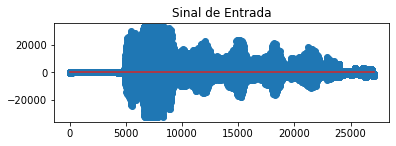

In [5]:
#Plotando o gráfico de entrada
plt.subplot(2, 1, 1)
plt.title("Sinal de Entrada")
plt.stem(entrada)

In [ ]:
#Plotando o gráfico de saida

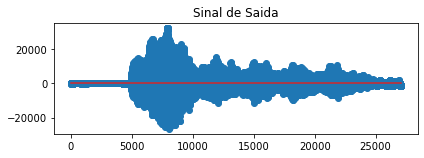

In [6]:
#Plotando o gráfico de saida
plt.subplot(2, 1, 2)
plt.title("Sinal de Saida")
plt.stem(vet_saida)
plt.tight_layout()

In [ ]:
#Salvando o novo arquivo

In [8]:
#Salvando o arquivo de saída
with open("delay.pcm", "wb") as novo:
    np.array(vet_saida, dtype=np.int16).tofile(novo)
novo.close()
    